In [84]:
from selenium import webdriver
driver = webdriver.Chrome("chromedriver.exe")  

In [85]:
import time

In [86]:
driver.get('https://www.instargram.com')
time.sleep(2)

In [ ]:
email = '인스타계정입력해주세요'  
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타비번입력해주세요'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

In [87]:
def insta_searching(word):    
    url = 'https://www.instagram.com/explore/tags/' + word
    return url 

In [88]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

In [89]:
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

In [90]:
import re
from bs4 import BeautifulSoup

In [120]:
#모든 게시물에 대해 공통적으로 작업
#html페이지 가져오기
#본문 가져오기
#해시태그 가져오기
#작성일자 가져오기

def getContent(driver):
    html=driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    content=soup.select("div.C4VMK")[0].text
    tags = re.findall("#\w+", content)
    #tags=re.findall("[#][ㄱ-힣A-Za-z]+",content)
    #tags=re.findall("#[\w]+[ ]*", content)
    #print(tags)
    
    #print(soup.select("time.FH9sR.Nzb55")[0])
    #print(soup.select("time._1o9PC.Nzb55")[0].attrs['datetime'][:10])
    date=soup.select("time._1o9PC.Nzb55")[0]['datetime'][:10]#type:str
    
    #print(soup.select("div.C4VMK")[0].text)
    #print(soup)    
    data=[content, tags, date]
    return data #본문,해시태그,작성일자

In [92]:
getContent()

['jyp_story3(광고)제주도민들도 극찬한 #운정이네중문에 위치한 아주아주 귀한맛집!제주 향토음식점 운정이네 에서맛있는 식사도하고제주를 온몸으로 느껴보는건 어떨까요?🌴🌴🌴🌴✔Am8:00시 빠른오픈으로 아침식사가능!제주하면 빠질수없는 제주갈치!운정이네 에서 재대로 즐겨보세요♥.비주얼,양,맛까지 모두 사로잡은운정이네 👍🏼(식사후엔 디저트로 커피,아이스크림까지🖤).운정이네제주 서귀포시 중간서로 726(지번) 1239-5🕰8:00~22:00문의: 064-738-3883.#제주맛집추천#제주서귀포맛집#서귀포갈치조림#제주도서귀포맛집#서귀포시맛집#중문관광단지맛집#제주도중문맛집#서귀포중문맛집#오설록맛집#제주중문맛집#제주갈치조림#제주도갈치조림#제주도갈치구이#제주갈치조림맛집#제주갈치구이맛집#제주도갈치구이맛집#제주도갈치조림맛집#중문맛집#제주도맛집#서귀포맛집21시간',
 ['#운정이네중문에',
  '#제주맛집추천',
  '#제주서귀포맛집',
  '#서귀포갈치조림',
  '#제주도서귀포맛집',
  '#서귀포시맛집',
  '#중문관광단지맛집',
  '#제주도중문맛집',
  '#서귀포중문맛집',
  '#오설록맛집',
  '#제주중문맛집',
  '#제주갈치조림',
  '#제주도갈치조림',
  '#제주도갈치구이',
  '#제주갈치조림맛집',
  '#제주갈치구이맛집',
  '#제주도갈치구이맛집',
  '#제주도갈치조림맛집',
  '#중문맛집',
  '#제주도맛집',
  '#서귀포맛집21시간'],
 '2021-07-22']

In [93]:
#  샵(#)기호로 시작하는 해시태그를 추출하여 리스트에 저장


In [125]:
def move_next(driver):
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

In [108]:
move_next(driver)

In [ ]:
#지금까지의 코드를 종합하여 50개의 게시글 수집하는 크롤러 생성

In [126]:
word = "제주도맛집"   
url = insta_searching(word)
driver.get(url)
time.sleep(3)
select_first(driver)

results = [ ]
target = 50 

for i in range(target):
    try:
        data = getContent(driver) #웹페이지 -> 소스코드 읽어오게 됨
        results.append(data)
        move_next(driver)
    except:
        time.sleep(1) #일단 좀 쉬다가...
        print("예외발생!")
        move_next(driver) #그냥 다음 페이지로 이동해
#다른 외부 요인(ex. 네트워크 문제 등)에 의해 게시글 읽어들이는 과정에서 에러가 발생할 수도 있음
#이런 경우를 예외상황 이라고 함.
#예외 처리 : 예외 상황을 미리 예상하여 대처하도록 하는 것
#try:
#      예외상황이 발생할 여지가 있는 코드  
#except:
#     예외 상황 처리 코드
print(results[:3])

[['dhflwlsjf8522협찬제주왔음 제주흑돼지는 무조건이지🐷규모가 매우커서 거리두기 철저해 코로나 걱정도 끝👊애월해안도로에 위치해있어 애월바다를 바라보며 로맨틱한 식사❤💯제주흑돼지맛집 "코시롱" 으로 당장 GoGo!!♦️ 제주 제주시 애월읍 애월해안로 656#코시롱#제주맛집 #제주도맛집#애월맛집#제주흑돼지맛집#애월해안도로맛집#애월읍맛집#애월맛집추천#애월흑돼지맛집#제주애월맛집#제주도흑돼지12시간', ['#코시롱', '#제주맛집', '#제주도맛집', '#애월맛집', '#제주흑돼지맛집', '#애월해안도로맛집', '#애월읍맛집', '#애월맛집추천', '#애월흑돼지맛집', '#제주애월맛집', '#제주도흑돼지12시간'], '2021-07-22'], ['jeju_murung_farm[찰라의 아침]오늘의 아침 일출이 너무 아름답니다이렇게 우리주변에는 아름다운 순간들이 많지만, 우리가 보지 못하고 느끼지 못해서 없다고 말하는 것은 아닐까요?오늘 우리 주변에 수많은 아름다운 순간들을 놓치지 말기를 기대해봅니다#무릉외갓집 #제주도 #마을기업 #제주올레 #제주올레11코스 #제주올레12코스 #제주도맛집 #제주맛집 #꾸러미 #곶자왈 #휴식5시간', ['#무릉외갓집', '#제주도', '#마을기업', '#제주올레', '#제주올레11코스', '#제주올레12코스', '#제주도맛집', '#제주맛집', '#꾸러미', '#곶자왈', '#휴식5시간'], '2021-07-22'], ['jyp_story3(광고)제주도민들도 극찬한 #운정이네중문에 위치한 아주아주 귀한맛집!제주 향토음식점 운정이네 에서맛있는 식사도하고제주를 온몸으로 느껴보는건 어떨까요?🌴🌴🌴🌴✔Am8:00시 빠른오픈으로 아침식사가능!제주하면 빠질수없는 제주갈치!운정이네 에서 재대로 즐겨보세요♥.비주얼,양,맛까지 모두 사로잡은운정이네 👍🏼(식사후엔 디저트로 커피,아이스크림까지🖤).운정이네제주 서귀포시 중간서로 726(지번) 1239-5🕰8:00~22:00문의: 064-738-3883.#제주맛집추천#제주서귀포맛집#서귀포갈치조림#제주도서

In [110]:
results

[]

In [127]:
results

[['dhflwlsjf8522협찬제주왔음 제주흑돼지는 무조건이지🐷규모가 매우커서 거리두기 철저해 코로나 걱정도 끝👊애월해안도로에 위치해있어 애월바다를 바라보며 로맨틱한 식사❤💯제주흑돼지맛집 "코시롱" 으로 당장 GoGo!!♦️ 제주 제주시 애월읍 애월해안로 656#코시롱#제주맛집 #제주도맛집#애월맛집#제주흑돼지맛집#애월해안도로맛집#애월읍맛집#애월맛집추천#애월흑돼지맛집#제주애월맛집#제주도흑돼지12시간',
  ['#코시롱',
   '#제주맛집',
   '#제주도맛집',
   '#애월맛집',
   '#제주흑돼지맛집',
   '#애월해안도로맛집',
   '#애월읍맛집',
   '#애월맛집추천',
   '#애월흑돼지맛집',
   '#제주애월맛집',
   '#제주도흑돼지12시간'],
  '2021-07-22'],
 ['jeju_murung_farm[찰라의 아침]오늘의 아침 일출이 너무 아름답니다이렇게 우리주변에는 아름다운 순간들이 많지만, 우리가 보지 못하고 느끼지 못해서 없다고 말하는 것은 아닐까요?오늘 우리 주변에 수많은 아름다운 순간들을 놓치지 말기를 기대해봅니다#무릉외갓집 #제주도 #마을기업 #제주올레 #제주올레11코스 #제주올레12코스 #제주도맛집 #제주맛집 #꾸러미 #곶자왈 #휴식5시간',
  ['#무릉외갓집',
   '#제주도',
   '#마을기업',
   '#제주올레',
   '#제주올레11코스',
   '#제주올레12코스',
   '#제주도맛집',
   '#제주맛집',
   '#꾸러미',
   '#곶자왈',
   '#휴식5시간'],
  '2021-07-22'],
 ['jyp_story3(광고)제주도민들도 극찬한 #운정이네중문에 위치한 아주아주 귀한맛집!제주 향토음식점 운정이네 에서맛있는 식사도하고제주를 온몸으로 느껴보는건 어떨까요?🌴🌴🌴🌴✔Am8:00시 빠른오픈으로 아침식사가능!제주하면 빠질수없는 제주갈치!운정이네 에서 재대로 즐겨보세요♥.비주얼,양,맛까지 모두 사로잡은운정이네 👍🏼(식사후엔 디저트로 커피,아이스크림까지🖤).운정이네제주 서귀포시 중간서로 

In [143]:
import pandas as pd

In [130]:
df=pd.DataFrame(results)
df
df.columns=['content', 'tags', 'date']

In [132]:
df
df.to_excel("result.xlsx", index=False)

In [174]:
raw_total=pd.read_excel("1_crawling_raw.xlsx")
raw_total['tags']
raw_total['tags'][0]

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [181]:
# total=[]
# tagsList=raw_total['tags'][1][2:-2].split("', '")
# for tag in tagsList:
#     total.append(tag)
    

#for tags in raw_total['tags']:
    

In [155]:
# total=[]
# test=['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행']
# for t in test:
#     total.append(t[1:])

In [156]:
print(total)

['제주핫플레이스', '제주여행', '제주여행', '제주도여행']


In [182]:
tags_total=[]
# raw_total['tags'][0]
# raw_total['tags'][8800]
for tags in raw_total['tags']:
    tagsList=tags[2:-2].split("', '")
    for tag in tagsList:
        tags_total.append(tag)
        
    #"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"
#     print(len(tags))
    #가장 많이 등장한 해시태그?
    #빈도수 조사


In [184]:
print(len(tags_total)) #149495 개 해시태그

149495


In [196]:
Counter(tags_total)
Counter(tags_total).most_common(50)
jejuDf=pd.DataFrame(Counter(tags_total).most_common(50))
jejuDf.columns=['tags', 'counts']
jejuDf

,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주도,2096
5,#제주,1567
6,#제주도여행,1555
7,#서귀포맛집,1392
8,#제주도가볼만한곳,1047
9,#서귀포,872


In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='counts', ylabel='tags'>

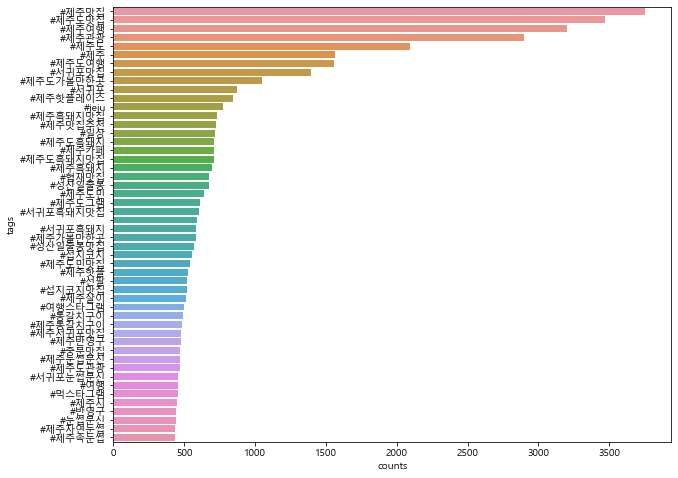

In [203]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags',data=jejuDf)

In [186]:
test=['a','a','b','b','b','c']

In [187]:
from collections import Counter

In [192]:
#Counter(test)['b']
Counter(test).most_common(2)

[('b', 3), ('a', 2)]